<a href="https://colab.research.google.com/github/yushi02/heatwave/blob/main/Hear_wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Dataset11-Weather-Data.csv')

In [4]:
data.shape

(8784, 8)

In [5]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [6]:
data.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [7]:
data.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [8]:
data.isna().sum().sum()

0

In [9]:
data.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [10]:
data.Weather.nunique()

50

In [11]:
x='Thunderstorms,Moderate Rain Showers,Fog'

In [12]:
list_of_lists=[w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [13]:
from itertools import chain
flat_list=list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [14]:
def Creat_list(x):
  list_of_lists=[w.split() for w in x.split(',')]
  flat_list=list(chain(*list_of_lists))
  return flat_list

def Get_weather(list1):
  if 'Fog' in list1 and 'Rain' in list1:
    return 'RAIN+FOG'
  elif 'Snow' in list1 and 'Rain' in list1:
    return 'SNOW+RAIN'
  elif 'Snow' in list1:
    return 'SNOW'
  elif 'Fog' in list1:
    return 'FOG'
  elif 'Rain' in list1:
    return 'RAIN'
  elif 'Clear' in list1:
    return 'CLEAR'

  elif 'Cloudy' in list1:
    return 'CLOUDY'
  else:
    return 'RAIN'


In [15]:
Creat_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [16]:
Get_weather(Creat_list(x))

'RAIN+FOG'

In [17]:
data['std_weather']=data['Weather'].apply(lambda x:Get_weather(Creat_list(x)))

In [18]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [19]:
cloudy_df=data[data['std_weather']=='CLOUDY'].sample(600)
clear_df=data[data['std_weather']=='CLEAR'].sample(600)
snow_df=data[data['std_weather']=='SNOW']
rain_df=data[data['std_weather']=='RAIN']

In [22]:
weather_df=pd.concat([cloudy_df,clear_df,snow_df,rain_df],axis=0)
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,std_weather
7523,11/9/2012 11:00,3.3,-4.1,58,20,48.3,101.36,Mostly Cloudy,CLOUDY
6992,10/18/2012 8:00,12.2,5.7,64,6,48.3,101.02,Mostly Cloudy,CLOUDY
6478,9/26/2012 22:00,12.6,7.5,71,7,25.0,101.39,Mostly Cloudy,CLOUDY
6479,9/26/2012 23:00,11.9,6.2,68,7,25.0,101.46,Mostly Cloudy,CLOUDY
2631,4/19/2012 15:00,20.2,3.9,34,28,48.3,100.69,Mostly Cloudy,CLOUDY


In [25]:
weather_df.drop(columns=['Date/Time','Weather'],axis=1,inplace=True)
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_weather
7523,3.3,-4.1,58,20,48.3,101.36,CLOUDY
6992,12.2,5.7,64,6,48.3,101.02,CLOUDY
6478,12.6,7.5,71,7,25.0,101.39,CLOUDY
6479,11.9,6.2,68,7,25.0,101.46,CLOUDY
2631,20.2,3.9,34,28,48.3,100.69,CLOUDY


In [26]:
weather_df.shape

(2359, 7)

In [28]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_weather


In [30]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
std_weather         0
dtype: int64

In [32]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
std_weather          object
dtype: object

In [34]:
col=['Temp_C','Dew Point Temp_C',	'Rel Hum_%',	'Wind Speed_km/h',	'Visibility_km',	'Press_kPa']
corr_matrix=weather_df[col].corr()
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.943105,-0.222895,-0.139496,0.375459,-0.100205
Dew Point Temp_C,0.943105,1.000000,0.107292,-0.138171,0.166097,-0.208153
Rel Hum_%,-0.222895,0.107292,1.000000,0.023883,-0.658131,-0.339925
Wind Speed_km/h,-0.139496,-0.138171,0.023883,1.000000,-0.137825,-0.389938
Visibility_km,0.375459,0.166097,-0.658131,-0.137825,1.000000,0.337073
Press_kPa,-0.100205,-0.208153,-0.339925,-0.389938,0.337073,1.000000


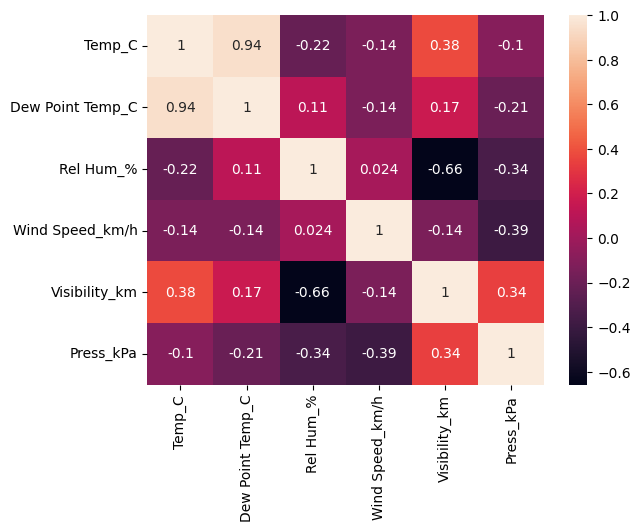

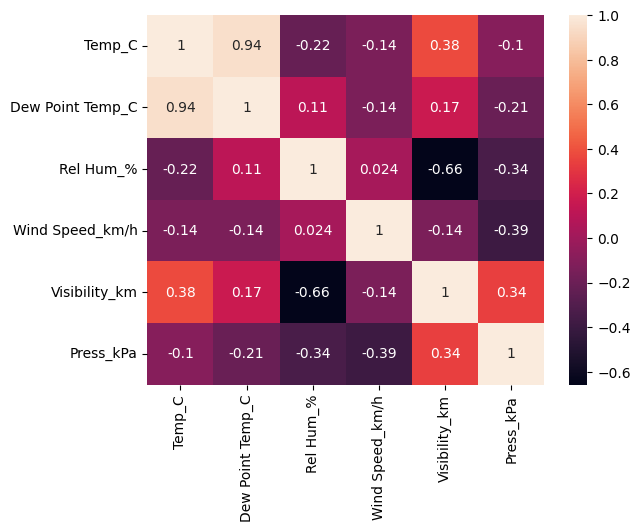

In [36]:
heatmap=sns.heatmap(corr_matrix,annot=True)
heatmap.get_figure()

<Axes: ylabel='Frequency'>

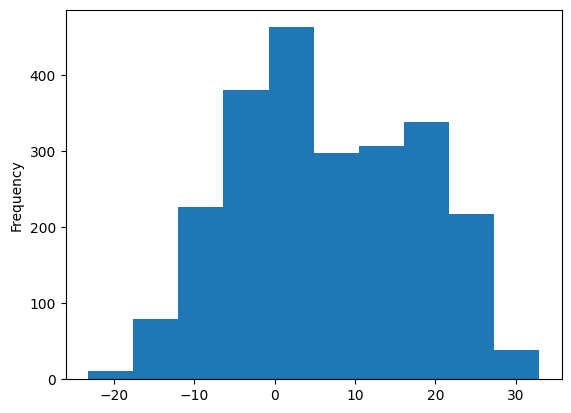

In [37]:
weather_df['Temp_C'].plot(kind='hist')

<Axes: ylabel='Frequency'>

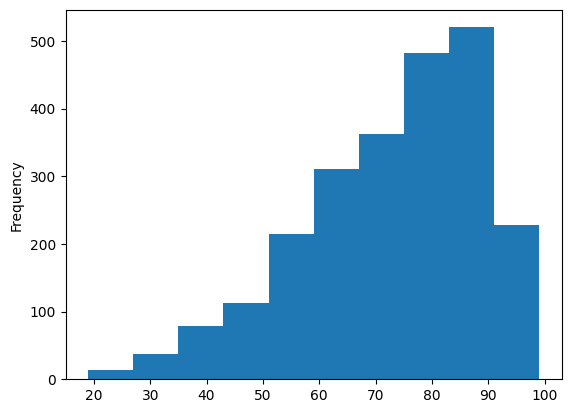

In [38]:
weather_df['Rel Hum_%'].plot(kind='hist')

<Axes: ylabel='Frequency'>

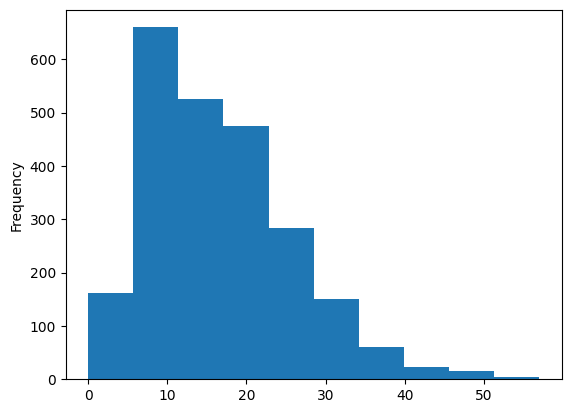

In [39]:
weather_df['Wind Speed_km/h'].plot(kind='hist')

<Axes: ylabel='Frequency'>

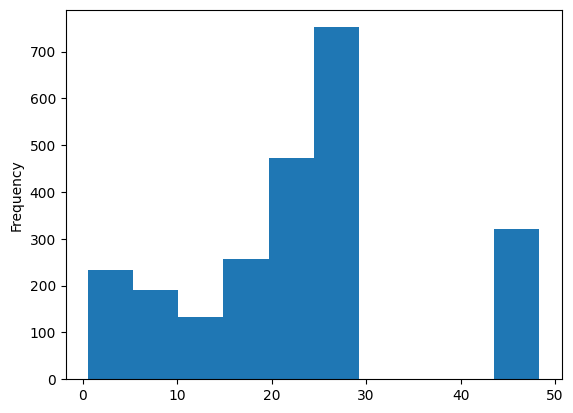

In [40]:
weather_df['Visibility_km'].plot(kind='hist')

<Axes: >

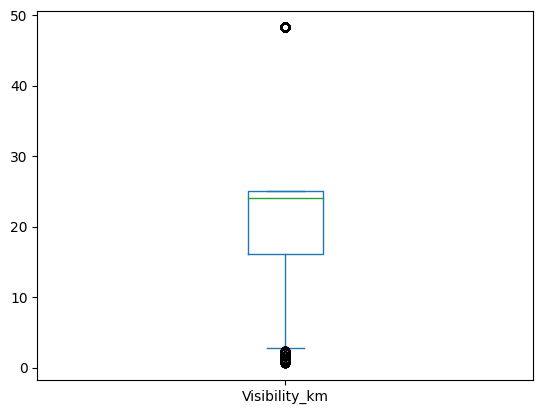

In [41]:
weather_df['Visibility_km'].plot(kind='box')

<Axes: >

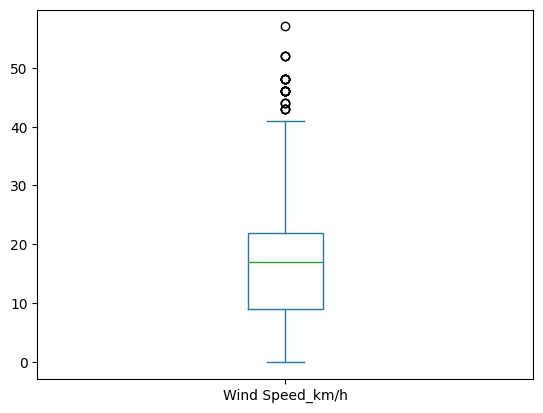

In [42]:
weather_df['Wind Speed_km/h'].plot(kind='box')

In [43]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
weather_df['std_weather']=label.fit_transform(weather_df['std_weather'])
weather_df.head()


,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,std_weather
7523,3.3,-4.1,58,20,48.3,101.36,1
6992,12.2,5.7,64,6,48.3,101.02,1
6478,12.6,7.5,71,7,25.0,101.39,1
6479,11.9,6.2,68,7,25.0,101.46,1
2631,20.2,3.9,34,28,48.3,100.69,1


In [44]:
weather_df['std_weather'].value_counts()

std_weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

In [45]:
label.classes_

array(['CLEAR', 'CLOUDY', 'RAIN', 'SNOW'], dtype=object)

In [46]:
x=weather_df.drop(columns='std_weather',axis=0)
y=weather_df['std_weather']

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [58]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(max_depth=5)

In [59]:
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [60]:
y_pred=model.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [61]:
accuracy_score(y_test,y_pred)

0.6313559322033898

In [62]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.48      0.82      0.61       116\n           1       0.46      0.23      0.31       125\n           2       0.73      0.71      0.72       108\n           3       0.91      0.79      0.84       123\n\n    accuracy                           0.63       472\n   macro avg       0.65      0.64      0.62       472\nweighted avg       0.64      0.63      0.62       472\n'

In [64]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()

In [65]:
model1.fit(x_train,y_train)

RandomForestClassifier()

In [66]:
y_pred1=model1.predict(x_test)

accuracy_score(y_test,y_pred1)

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [71]:
model_dt=DecisionTreeClassifier(max_depth=5)
model_rf=RandomForestClassifier()
model_svc=SVC()
model_knn=KNeighborsClassifier()
model_log=LogisticRegression()
model_nb=GaussianNB()
model_list=[model_dt,model_rf,model_svc,model_knn,model_log,model_nb]

In [72]:
acc_list=[]
for model in model_list:
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  acc=accuracy_score(y_test,y_pred)
  acc_list.append(acc)
acc_list

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.6313559322033898,
 0.6970338983050848,
 0.6186440677966102,
 0.6101694915254238,
 0.6101694915254238,
 0.614406779661017]

In [73]:
model_df=pd.DataFrame({'Model':model_list,'Accuracy':acc_list})
model_df

,Model,Accuracy
0,DecisionTreeClassifier(max_depth=5),0.631356
1,"(DecisionTreeClassifier(max_features='sqrt', r...",0.697034
2,SVC(),0.618644
3,KNeighborsClassifier(),0.610169
4,LogisticRegression(),0.610169
5,GaussianNB(),0.614407


from matplotlib import pyplot as plt
model_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

TypeError: '<' not supported between instances of 'RandomForestClassifier' and 'DecisionTreeClassifier'

from matplotlib import pyplot as plt
import seaborn as sns
model_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
model_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(model_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(model_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)